<a href="https://colab.research.google.com/github/Vrushali9-collab/statsmodels-linear-regression/blob/main/studperf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight") 


In [ ]:
dataset=pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
dataset.shape

(1000, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [ ]:
pip install missingo

ERROR: Could not find a version that satisfies the requirement missingo (from versions: none)
ERROR: No matching distribution found for missingo


In [ ]:
import missingno as msno

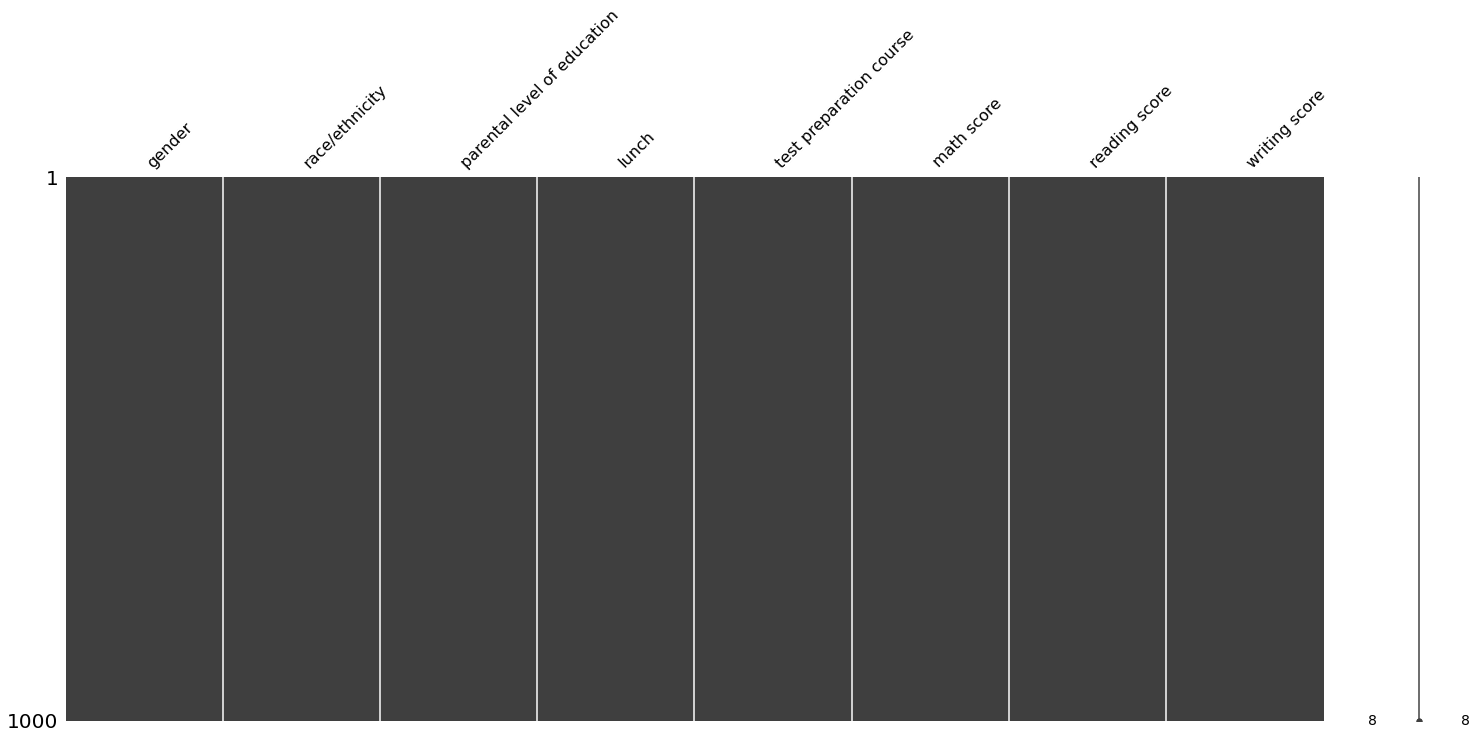

In [ ]:
msno.matrix(dataset)

Data Vizualiztion 

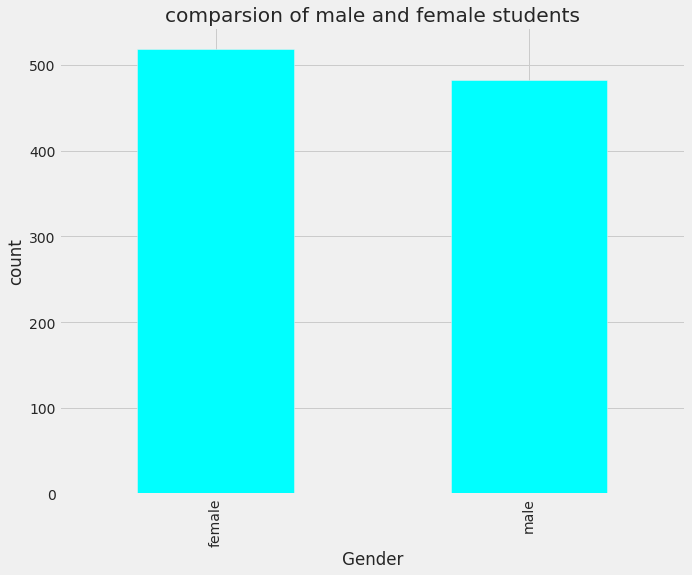

In [ ]:
plt.subplots(figsize=(10,8))
dataset['gender'].value_counts(normalize=True)
dataset['gender'].value_counts(dropna=True).plot.bar(color='cyan')
plt.title('comparsion of male and female students')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

In [ ]:
dataset.head

<bound method NDFrame.head of      gender race/ethnicity  ... reading score writing score
0    female        group B  ...            72            74
1    female        group C  ...            90            88
2    female        group B  ...            95            93
3      male        group A  ...            57            44
4      male        group C  ...            78            75
..      ...            ...  ...           ...           ...
995  female        group E  ...            99            95
996    male        group C  ...            55            55
997  female        group C  ...            71            65
998  female        group D  ...            78            77
999  female        group D  ...            86            86

[1000 rows x 8 columns]>

In [ ]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
dataset['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

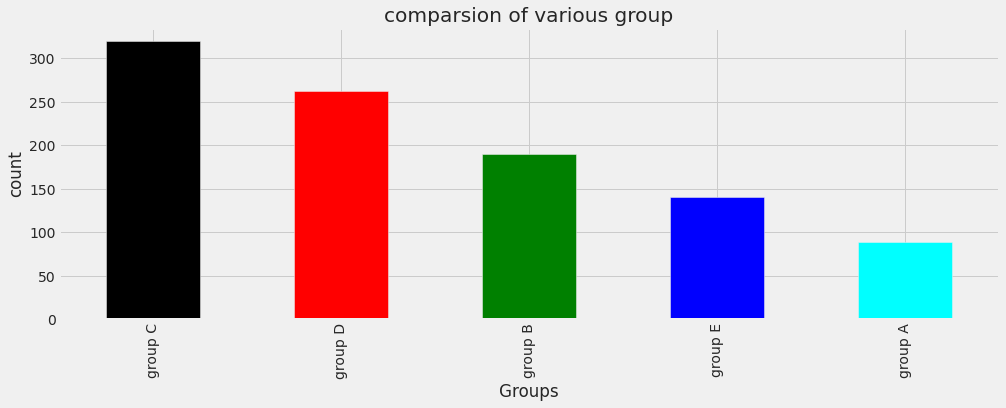

In [ ]:
#visualiztion the different groups in the dataset
plt.subplots(figsize=(15,5))
dataset['race/ethnicity'].value_counts(normalize=True)
dataset['race/ethnicity'].value_counts(dropna=False).plot.bar(color=['black','red','green','blue','cyan'])
plt.title('comparsion of various group')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

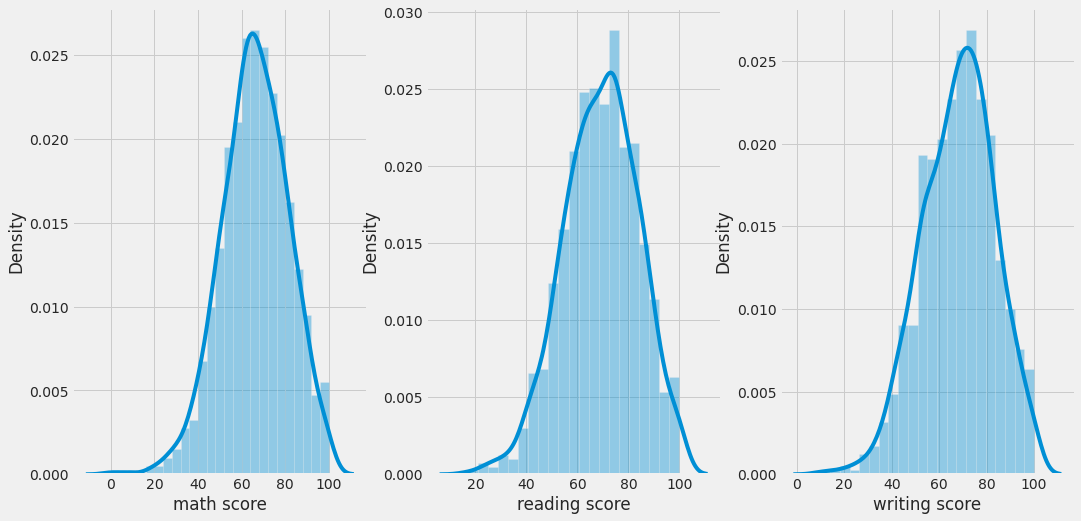

In [ ]:
#outliers
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
sns.distplot(dataset['math score'])

plt.subplot(1,3,2)
sns.distplot(dataset['reading score'])

plt.subplot(1,3,3)
sns.distplot(dataset['writing score'])

plt.show()





In [ ]:
#lets take seed
np.random.seed(10)

sample_math_marks=np.random.choice(a=dataset['math score'],size=100)
#getting math score mean
print("Sample mean for math score:",sample_math_marks.mean())
#getting the population mean 
print("population mean for math score:",dataset['math score'].mean())

sample_reading_score=np.random.choice(a=dataset['reading score'],size=100)
#getting math score mean
print("Sample mean for reading score:",sample_reading_score.mean())
#getting the population mean 
print("population mean for reading score:",dataset['reading score'].mean())


sample_writing_score=np.random.choice(a=dataset['writing score'],size=100)
#getting math score mean
print("Sample mean for writing score:",sample_writing_score.mean())
#getting the population mean 
print("population mean for writing score:",dataset['writing score'].mean())


Sample mean for math score: 67.4
population mean for math score: 66.089
Sample mean for reading score: 66.67
population mean for reading score: 69.169
Sample mean for writing score: 66.51
population mean for writing score: 68.054


In [ ]:
#confidence intervale for math score
import scipy.stats as stats
import math 

np.random.seed(10)

sample_size=1000
sample =np.random.choice(a=dataset['math score'],size=sample_size)
sample_mean=sample.mean()


#check z_critical value
z_critical=stats.norm.ppf(q=0.95)

print("z_critical value:",z_critical)

#get population standard devition 
pop_stdev=dataset['math score'].std()

#checking the margin of level 
margin_of_error=z_critical*(pop_stdev/math.sqrt(sample_size))

#defining our confidence interval 
confidence_interval=(sample_mean-margin_of_error, sample_mean+margin_of_error)

#print results
print("confidence interval:", end="")
print(confidence_interval)
print("True mean:{}".format(dataset['math score'].mean()))

#we can check same interval for reading and writing score 




z_critical value: 1.6448536269514722
confidence interval:(64.82729483328328, 66.40470516671672)
True mean:66.089


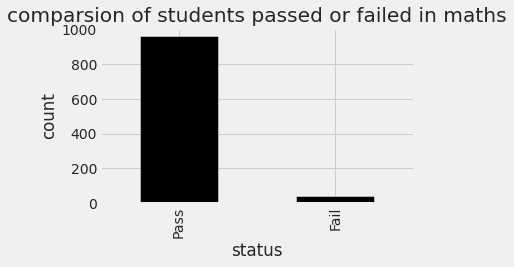

In [ ]:
#setting a passing mark for the students to pass on the three subject individualiy
plt.subplots(figsize=(15,8))
passmarks=40

#creating a new col pass_math this col will tell us whether the students are pass or fail
dataset['pass_math']=np.where(dataset['math score'] < passmarks, 'Fail' , 'Pass')
dataset['pass_math'].value_counts(dropna=False).plot.bar(color ='black',figsize=(5,3))

plt.title('comparsion of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

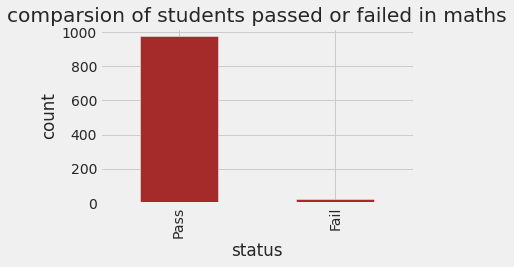

In [ ]:
#creating a new col pass_math this col will tell us whether the students are pass or fail
dataset['pass_reading']=np.where(dataset['reading score'] < passmarks, 'Fail' , 'Pass')
dataset['pass_reading'].value_counts(dropna=False).plot.bar(color ='brown',figsize=(5,3))

plt.title('comparsion of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

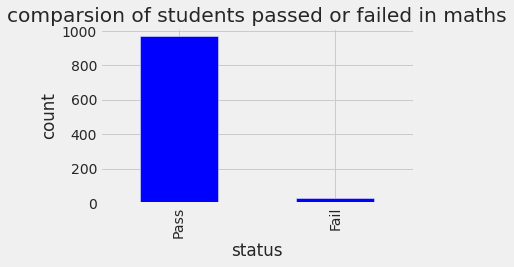

In [ ]:
#creating a new col pass_math this col will tell us whether the students are pass or fail
dataset['pass_writing']=np.where(dataset['writing score'] < passmarks, 'Fail' , 'Pass')
dataset['pass_writing'].value_counts(dropna=False).plot.bar(color ='blue',figsize=(5,3))

plt.title('comparsion of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

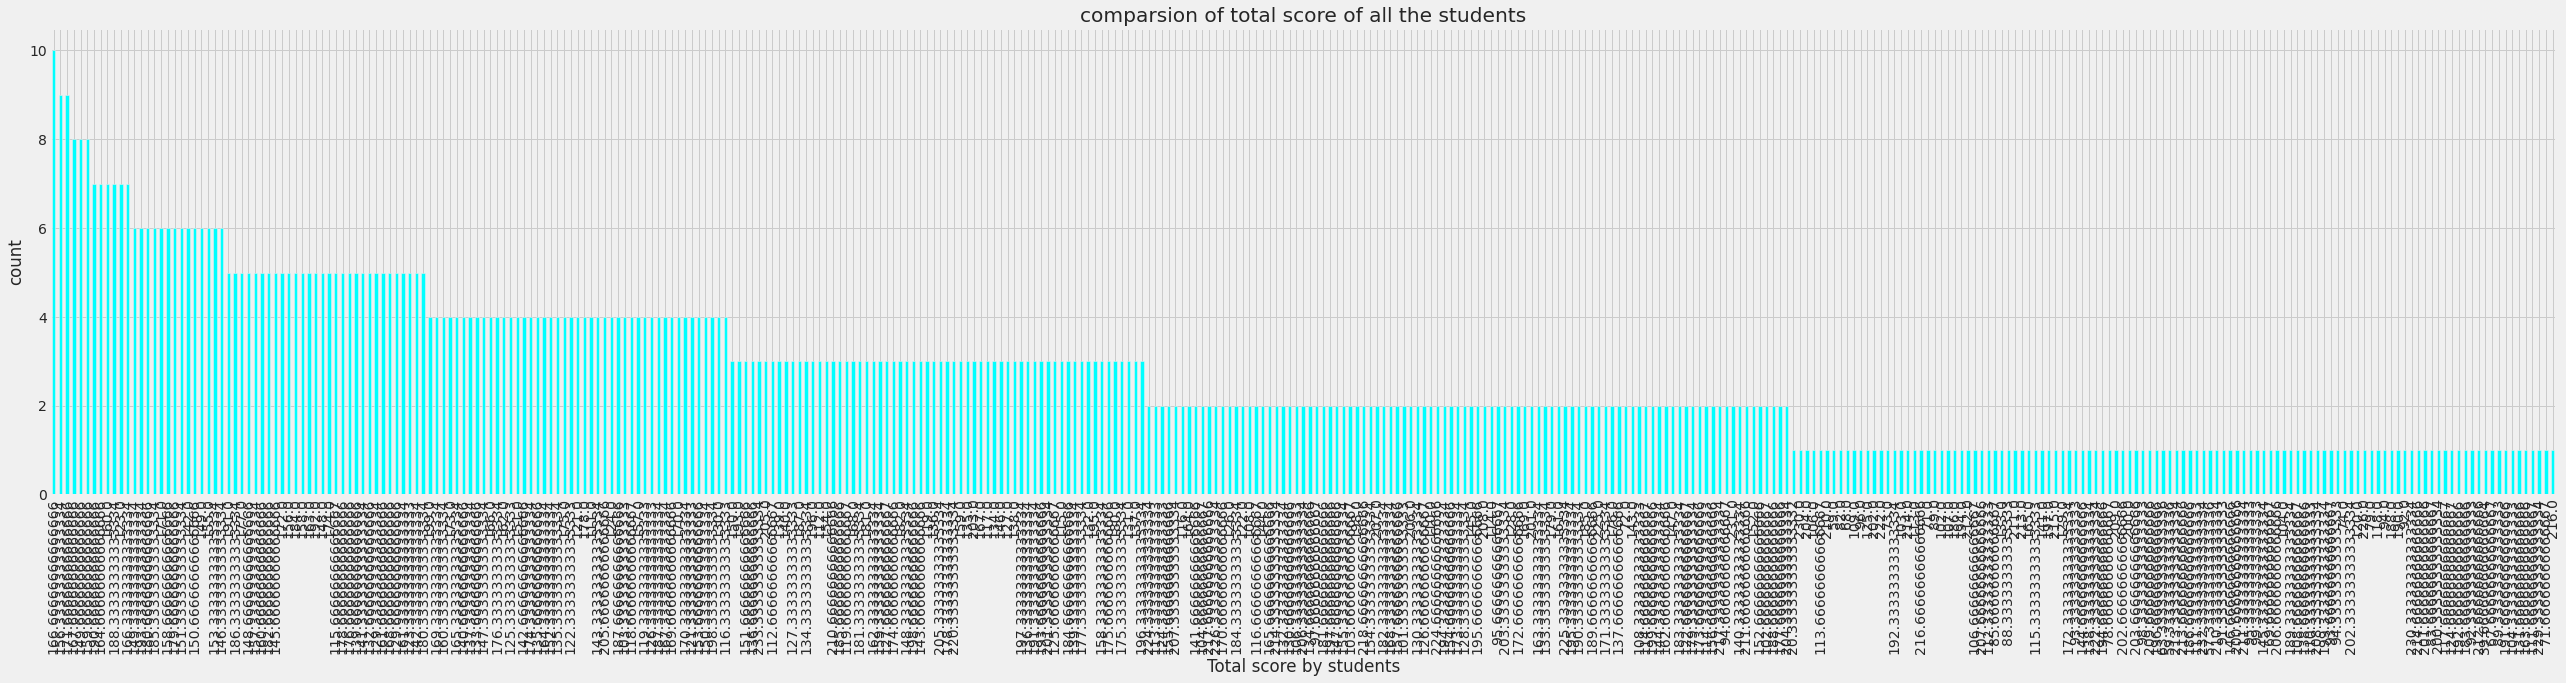

In [ ]:
#computing the total score by each students
plt.subplots(figsize=(15,8))
dataset['total_score']=dataset['math score']+dataset['reading score']+dataset['writing score']/3

dataset['total_score'].value_counts(normalize=True)
dataset['total_score'].value_counts(dropna=True).plot.bar(color='cyan',figsize=(40,8))

plt.title('comparsion of total score of all the students')
plt.xlabel('Total score by students')
plt.ylabel('count')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


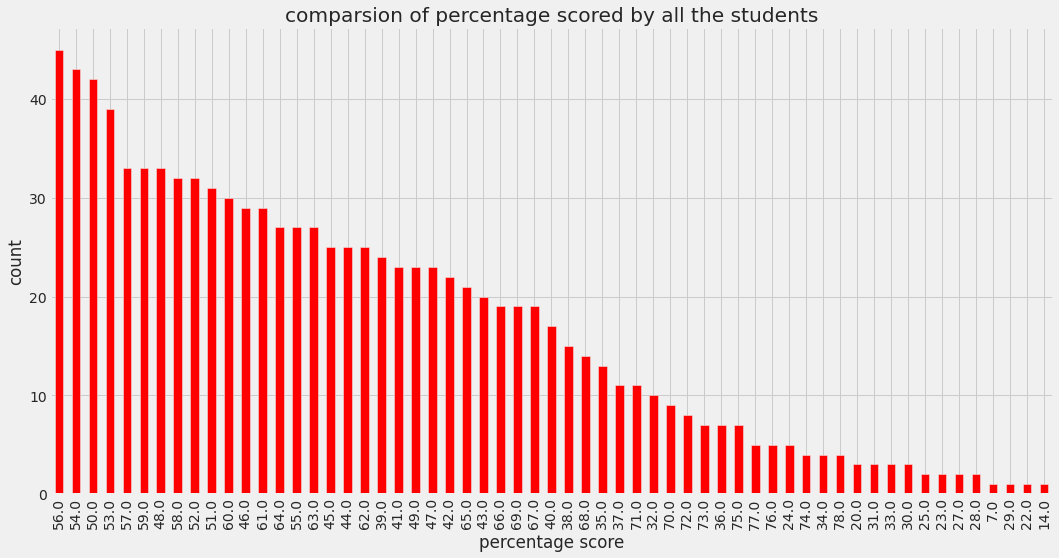

In [ ]:
#computing the percentage of each students
from math import *
dataset['percentage']=dataset['total_score']/3

for i in range(0,1000):
    dataset['percentage'][i]=ceil(dataset['percentage'][i])

dataset['percentage'].value_counts(normalize=True)
dataset['percentage'].value_counts(dropna=False).plot.bar(figsize=(16,8),color='red')

plt.title('comparsion of percentage scored by all the students')
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

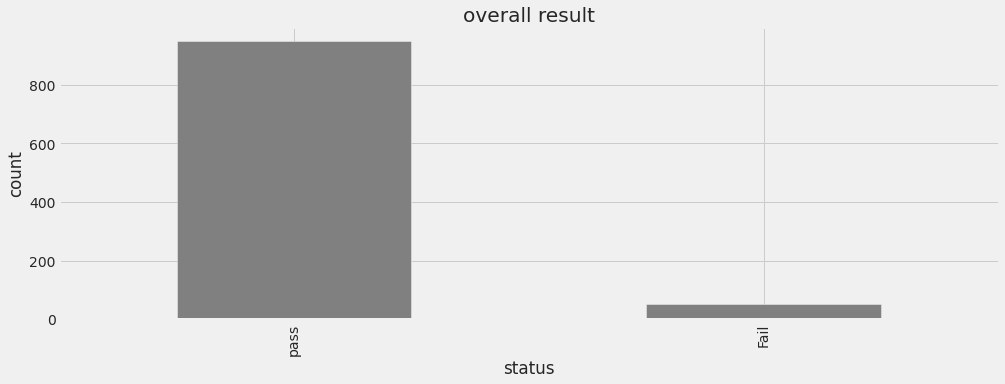

In [ ]:
#checking which students is fail overall
dataset['status']=dataset.apply(lambda  x: 'Fail' if x['pass_math']=='Fail' or 
		    x['pass_reading']=='Fail' or x['pass_writing']=='Fail'
                                    else 'pass', axis=1)
dataset['status'].value_counts(dropna=False).plot.bar(color='gray',figsize=(15,5))

plt.title('overall result')
plt.xlabel('status')
plt.ylabel('count')
plt.show()


In [ ]:
#setting passing mark for the students to pass on the three subjects individully
import matplotlib.pyplot as plt

passmarks=40
plt.rcParams["figure.figsize"]=(18,12)

#creating new col pass_math this col will tell us whether the students are pass or fail
dataset['pass_math']=np.where(dataset['math score'] < passmarks, 'Fail' , 'Pass')
dataset['pass_reading']=np.where(dataset['reading score'] < passmarks, 'Fail' , 'Pass')
dataset['pass_writing']=np.where(dataset['writing score'] < passmarks, 'Fail' , 'Pass')

#pie chart to represent the ratio of pass and fail status between students
size=dataset['pass_math'].value_counts()
colors=plt.cm.Reds(np.linspace(0,1,3))
labels="pass","fail" 
explode=[0,0.2]

plt.subplot(1,3,1)
plt.pie(size,color=colors,labels=labels,autopct='%2f%%',explode=explode,shadow=True)
plt.title('students result for maths',fontsize=20)
plt.legend()

size=Dataset['pass_reading'].value_counts()
colors=plt.cm.Greens(np.linspace(0,1,2))
labels="pass","fail"
explode=[0,0.2]

plt.subplot(1,3,2)
plt.pie(size,color=colors,labels=labels,autopct='%2f%%',explode=explode,shadow=True)
plt.title('students result for reading',fontsize=20)
plt.legend()

size=Dataset['pass_writing'].value_counts()
colors=plt.cm.Blue(np.linspace(0,1,3))
labels="pass","fail"
explode=[0,0.2]

plt.subplot(1,3,3)
plt.pie(size,color=colors,labels=labels,autopct='%2f%%',explode=explode,shadow=True)
plt.title('students result for writing',fontsize=20)
plt.legend()

plt.show()



NameError: ignored